In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv"

In [5]:
data = pd.read_csv(url)
data.head(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,0
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,0
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,0
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,0
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,0


In [6]:
features = data[data.columns[0:6]]

In [7]:
features.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
121,18.14,16.12,0.8772,6.059,3.563,3.619
87,18.98,16.66,0.8590,6.549,3.670,3.691
32,14.09,14.41,0.8529,5.717,3.186,3.920
198,12.62,13.67,0.8481,5.410,2.911,3.306
104,18.95,16.42,0.8829,6.248,3.755,3.368
1,14.88,14.57,0.8811,5.554,3.333,1.018
35,16.12,15.00,0.9000,5.709,3.485,2.270
205,12.19,13.20,0.8783,5.137,2.981,3.631
67,14.01,14.29,0.8625,5.609,3.158,2.217
55,15.03,14.77,0.8658,5.702,3.212,1.933


As you can see, the dataset contains six data points (or features) for each instance (observation) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Six-dimensional space is difficult to visualize in a three-dimensional world, or on a two-dimensional plot. We'll take advantage of a mathematical technique called Principal Component Analysis (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the six-dimensional feature values into two-dimensional coordinates.

In [9]:
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

In [10]:
scaled_features

array([[0.44098206, 0.50206612, 0.5707804 , 0.48648649, 0.48610121,
        0.18930164],
       [0.40509915, 0.44628099, 0.66243194, 0.36880631, 0.50106914,
        0.03288302],
       [0.34938621, 0.34710744, 0.87931034, 0.22072072, 0.50392017,
        0.25145302],
       ...,
       [0.24645892, 0.25826446, 0.7277677 , 0.18975225, 0.42908054,
        0.98166664],
       [0.11803588, 0.16528926, 0.39927405, 0.15540541, 0.14682823,
        0.36834441],
       [0.16147309, 0.19214876, 0.54718693, 0.19369369, 0.24518888,
        0.63346292]])

In [11]:
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

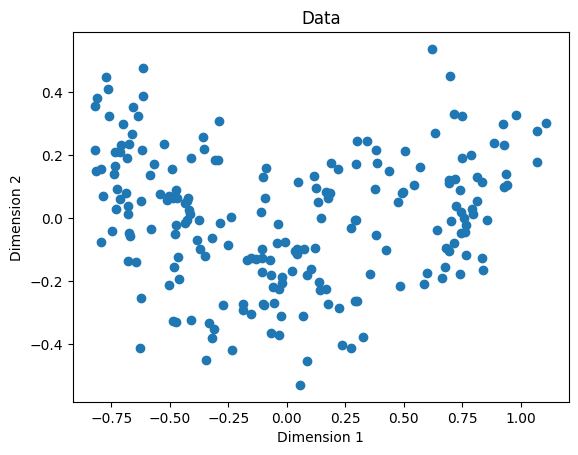

In [12]:
plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

/Users/pranavmohan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pranavmohan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pranavmohan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/pranavmohan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

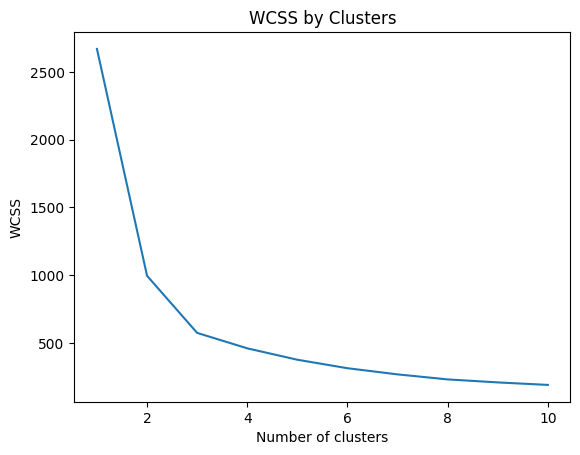

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Hopefully you can see at least two, arguably three, reasonably distinct groups of data points. This shows one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the within cluster sum of squares (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

The plot shows a large reduction in WCSS (so greater tightness) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.